In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prompt
## What factors help predict whether or not a school will create a quote? 
**Note**: Every user who signed up during the 2016-2017 school year got a free trial which expires on June 30, 2017.

# EDA

### users.csv: 
Includes teacher information from 2000 randomly selected schools in our database, and whether or not they created a quote.

In [2]:
users_df = pd.read_csv('./Data/users.csv')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10181 entries, 0 to 10180
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   User ID                 10181 non-null  int64 
 1   Organization ID         10181 non-null  int64 
 2   Organization Type       10181 non-null  object
 3   Country                 10013 non-null  object
 4   State                   10012 non-null  object
 5   NGSS Status             8999 non-null   object
 6   Grade level             9829 non-null   object
 7   Sign up date            9822 non-null   object
 8   Activation date         7749 non-null   object
 9   Full Trial expiry date  7879 non-null   object
 10  Quote created?          10181 non-null  bool  
dtypes: bool(1), int64(2), object(8)
memory usage: 805.5+ KB


### viewings.csv: 
each of the teachers’ viewings of lessons during the 2016-2017 school year.

In [3]:
viewings_df = pd.read_csv('./Data/viewings.csv')
viewings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44339 entries, 0 to 44338
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         44339 non-null  int64  
 1   lesson_id                  43725 non-null  float64
 2   user_id                    44339 non-null  int64  
 3   started_at                 44339 non-null  object 
 4   created_at                 44339 non-null  object 
 5   updated_at                 44339 non-null  object 
 6   duration                   44339 non-null  float64
 7   ended_at                   44063 non-null  object 
 8   potentially_taught         44339 non-null  bool   
 9   video_duration             44339 non-null  float64
 10  user_session_id            44339 non-null  int64  
 11  previewed                  44339 non-null  bool   
 12  fullscreen_video_duration  2179 non-null   float64
 13  fullscreened               2179 non-null   obj

**previewed:** indicates whether a user has started two more videos

**potentially_taught:** true if more than 75% of the lesson was watched during school hours for that teacher. Internally, we count a potentially taught lesson as one hour of teaching.

**full_screened:** indicates whether a user used full screen mode when viewing the lesson

# Merging Data

The `users` dataset has 10181 records indexed by `User IDs`.

And the `viewings` dataset has 44339 records indexed by `ids`.

To preserve as much data as possible, we'll merge the `users` and `viewings` datasets on a shared feature
`viewings_df.user_id` == `users_df.UserID` 

In [4]:
# merge viewings_df and users_df on v.user_id == u.User ID
user_viewings_df = viewings_df.merge(users_df, left_on='user_id', right_on='User ID').set_index('id').drop(columns=['User ID'])
user_viewings_df.head()

,lesson_id,user_id,started_at,created_at,updated_at,duration,ended_at,potentially_taught,video_duration,user_session_id,previewed,fullscreen_video_duration,fullscreened,Organization ID,Organization Type,Country,State,NGSS Status,Grade level,Sign up date,Activation date,Full Trial expiry date,Quote created?
id,,,,,,,,,,,,,,,,,,,,,,,
3535094,112.0,7670,2016-11-11 05:27:45 -0800,2016-11-11 05:27:45 -0800,2016-11-11 05:33:31 -0800,0.000,2016-11-11 05:27:45 -0800,False,0.00,7306328,False,NaN,NaN,12476,School,United States,Florida,NaN,"K, 1, 2",2014-09-15,2014-09-15,2016-06-30,False
3535095,112.0,7670,2016-11-11 05:27:45 -0800,2016-11-11 05:27:45 -0800,2016-11-11 05:53:01 -0800,1186.358,2016-11-11 05:47:32 -0800,False,949.37,7306328,True,NaN,NaN,12476,School,United States,Florida,NaN,"K, 1, 2",2014-09-15,2014-09-15,2016-06-30,False
3536432,114.0,7670,2016-11-11 05:47:57 -0800,2016-11-11 05:47:57 -0800,2016-12-23 19:58:34 -0800,178.508,2016-11-11 05:50:56 -0800,False,0.00,7306328,True,NaN,NaN,12476,School,United States,Florida,NaN,"K, 1, 2",2014-09-15,2014-09-15,2016-06-30,False
3916927,75.0,9148,2016-12-11 05:48:30 -0800,2016-12-11 05:48:37 -0800,2016-12-23 21:35:07 -0800,110.000,2016-12-11 05:50:20 -0800,False,63.00,7970073,True,NaN,NaN,345365,School,United States,Maryland,NaN,5,2014-10-21,2014-10-21,2016-06-30,False
5081285,98.0,9148,2017-02-28 10:46:47 -0800,2017-02-28 10:46:47 -0800,2017-02-28 10:46:47 -0800,0.000,NaN,False,0.00,9729422,False,NaN,NaN,345365,School,United States,Maryland,NaN,5,2014-10-21,2014-10-21,2016-06-30,False


# Data Cleaning

Using a cool tool from the [missingno](https://github.com/ResidentMario/missingno) library, we can visualize the first thing we should check for, missing values. 

<AxesSubplot:>

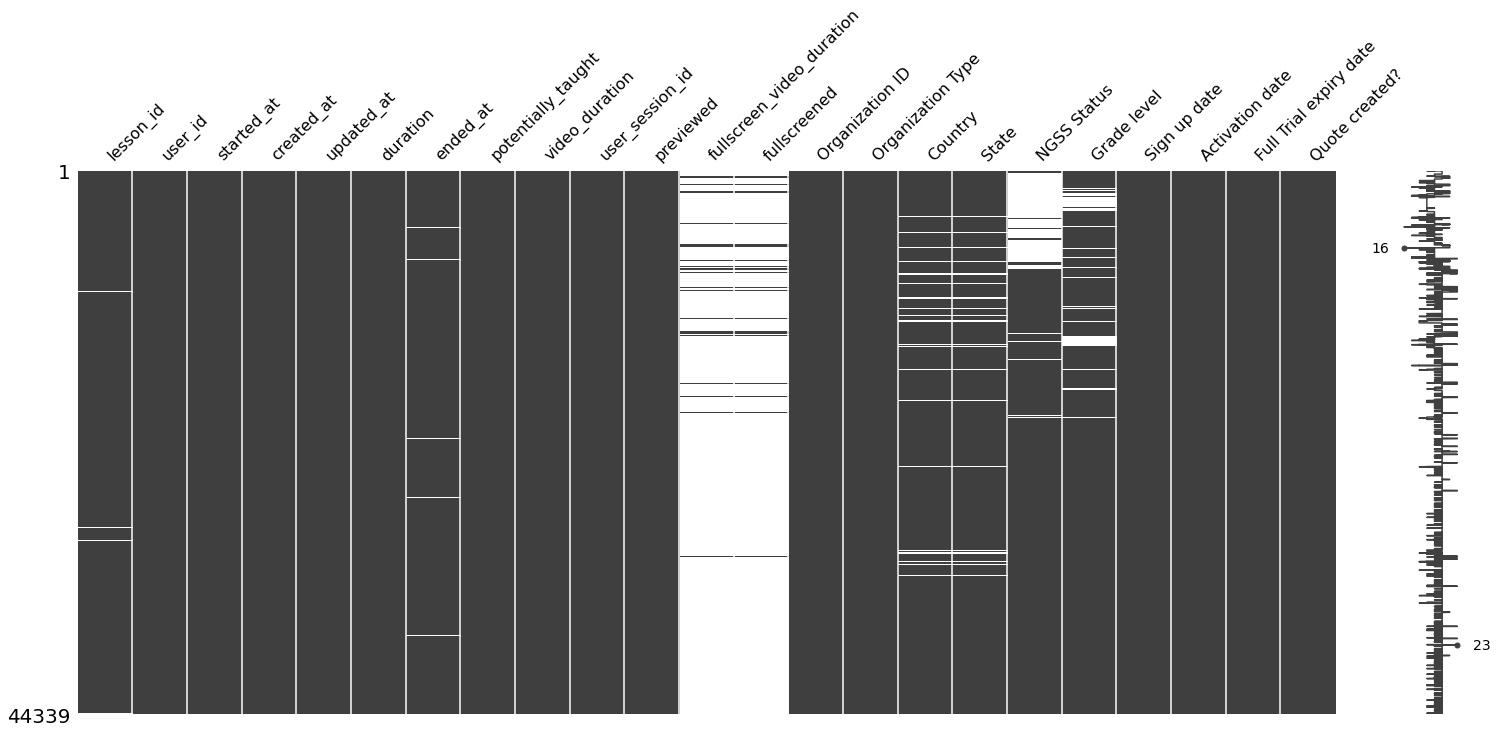

In [5]:
# plot matix to see missing values
msno.matrix(user_viewings_df)

## ROWS
#### Noteable chunk of rows missing from these columns. Lets take a closer look and try to imput values if we can. 
- **`NGSS Status`**

In [6]:
# Review value_counts of NGSS Status
user_viewings_df['NGSS Status'].value_counts()

yes              13583
transitioning    12532
not sure          5553
no                5122
Name: NGSS Status, dtype: int64

#### Reflection of NGSS Status column
- Nice! Looks like theres a `not sure` category that we can use to imput all the missing values. 

<AxesSubplot:>

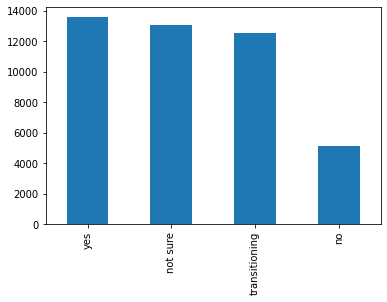

In [7]:
# fill NGSS Status null values with 'not sure'
user_viewings_df['NGSS Status'].fillna(value='not sure', inplace=True)
# plot the value_counts of NGSS Status
user_viewings_df['NGSS Status'].value_counts().plot(kind='bar')

- **`Grade level`**

In [8]:
# Review value_counts of Grade Level
user_viewings_df['Grade level'].value_counts()

3                                        10054
5                                         7229
4                                         7095
2                                         5082
1                                         2705
K                                         1426
K, 1, 2, 3, 4, 5                           984
4, 5                                       735
Upper                                      669
K, 5                                       618
5, Upper                                   385
2, 3                                       333
K, 1                                       309
1, 2                                       296
3, 4                                       282
1, 2, 3, 4, 5                              244
K, 1, 2, 3, 5                              226
1, 2, 3, 4, 5, Upper                       215
K, 1, 2, 3, 4                              196
Pre, K, 1, 2                               191
K, 1, 3, 4, Upper                          172
Upper, Upper 

### Reflection of Grade Level column
- Unfortuantely it doesn't look like we'll get a clear picture of the value counts because **these values need to be expanded** to separate columns

In [9]:
# For every value in `Grade level`, strip the spaces off the edges, and split the value on ',' and 
# expand the value into a new column. then stack. 
split_grades = user_viewings_df['Grade level'].str.split(', ', expand=True).stack()
# Take the multi-indexed (stacked) grades and pass them into a DataFrame grouped by id
encoded_grades = pd.get_dummies(split_grades).groupby(level=0).sum()

##### Which grade is more probable?

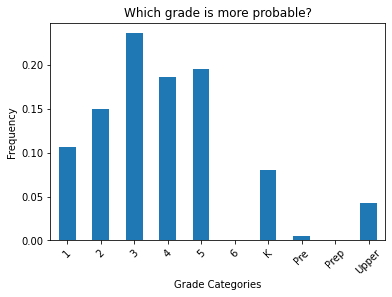

In [10]:
# calculate the probability of each grade level
pd_grade_level = (encoded_grades.sum()/encoded_grades.sum().sum())
# plot the probability of each graded level
pd_grade_level.plot(kind='bar')
# axis labels
plt.title("Which grade is more probable?")
plt.xlabel('Grade Categories')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
# show the plot
plt.show()

- This bargraph represents the the relative frequencies of each possible `Grade Level`. 
- We can use these relative frequencies to impute null values in `Grade Level` fairly.
- But wait! We saw that some rows have multiple grade levels, so **should we pick more than one?**

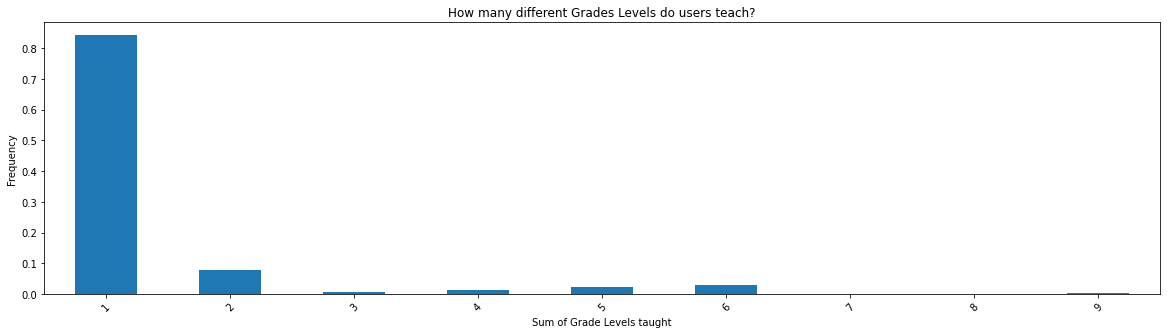

In [11]:
# sum each row into a total grades taught column
encoded_grades['total_grades_taught'] = encoded_grades.sum(axis=1)

# and plot the value_counts
encoded_grades['total_grades_taught'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(20,5))
# axis labels
plt.title("How many different Grades Levels do users teach?")
plt.xlabel('Sum of Grade Levels taught')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
# show the plot
plt.show()

- This graph shows **more than 80% of observations have only one `Grade level`** associated.
- This means we can use our relative frequencies from above to randomly fill na values with single `Grade levels`

In [12]:
# So lets get a bool matrix indicating whether the Grade level is null or not
missing = user_viewings_df['Grade level'].isnull()

# Then using that matrix, lets fill nulls with available options according to the probability associated in pd_grade_level
user_viewings_df.loc[missing,'Grade level'] = np.random.choice(pd_grade_level.index, size=len(user_viewings_df[missing]),
                                                               p=pd_grade_level.values)

## ROWS (continued)
#### Negligble chunk of rows missing from these columns. Because there are nearly 45K rows of data we can afford to lose drop null values from:
- `lesson_id`
- `ended_at` 
- `Country`
- `State`

## COLUMNS
#### These columns are effectively empty. We can reconsider how we'd want to handle this after we've run a dataset without these features, but lets take a look at the values first.
- `fullscreen_video_duration`
- `fullscreened` 

In [13]:
# define empty_columns list
empty_columns = ['fullscreened', 'fullscreen_video_duration']
# Review empty columns datatype, nunique values, and value_counts
for column in empty_columns:
    missing_values = user_viewings_df[column].isna().sum()
    print("")
    print(f"The {column} column has been assigned a datatype of : {user_viewings_df.dtypes[column]}")
    print(f"This column is missing {missing_values} values. Thats {round((missing_values/user_viewings_df.shape[0])*100)}%")
    print(f"unique values: {user_viewings_df[column].nunique()}")
    print(user_viewings_df[column].value_counts(normalize=True).head())


The fullscreened column has been assigned a datatype of : object
This column is missing 42160 values. Thats 95%
unique values: 2
False    0.993116
True     0.006884
Name: fullscreened, dtype: float64

The fullscreen_video_duration column has been assigned a datatype of : float64
This column is missing 42160 values. Thats 95%
unique values: 412
0.0      0.766866
50.0     0.001836
326.0    0.001836
773.0    0.001377
282.0    0.001377
Name: fullscreen_video_duration, dtype: float64


### Reflection on Columns with missing values
- 95% of both columns are missing data.
- Of the existing 'fullscreened' values, 99% == False.
- Of the existing 'fullscreen_video_duration' values, 76% == 0.
- The value counts of these (already sparse) columns indicate **they're better off dropped.**

<AxesSubplot:>

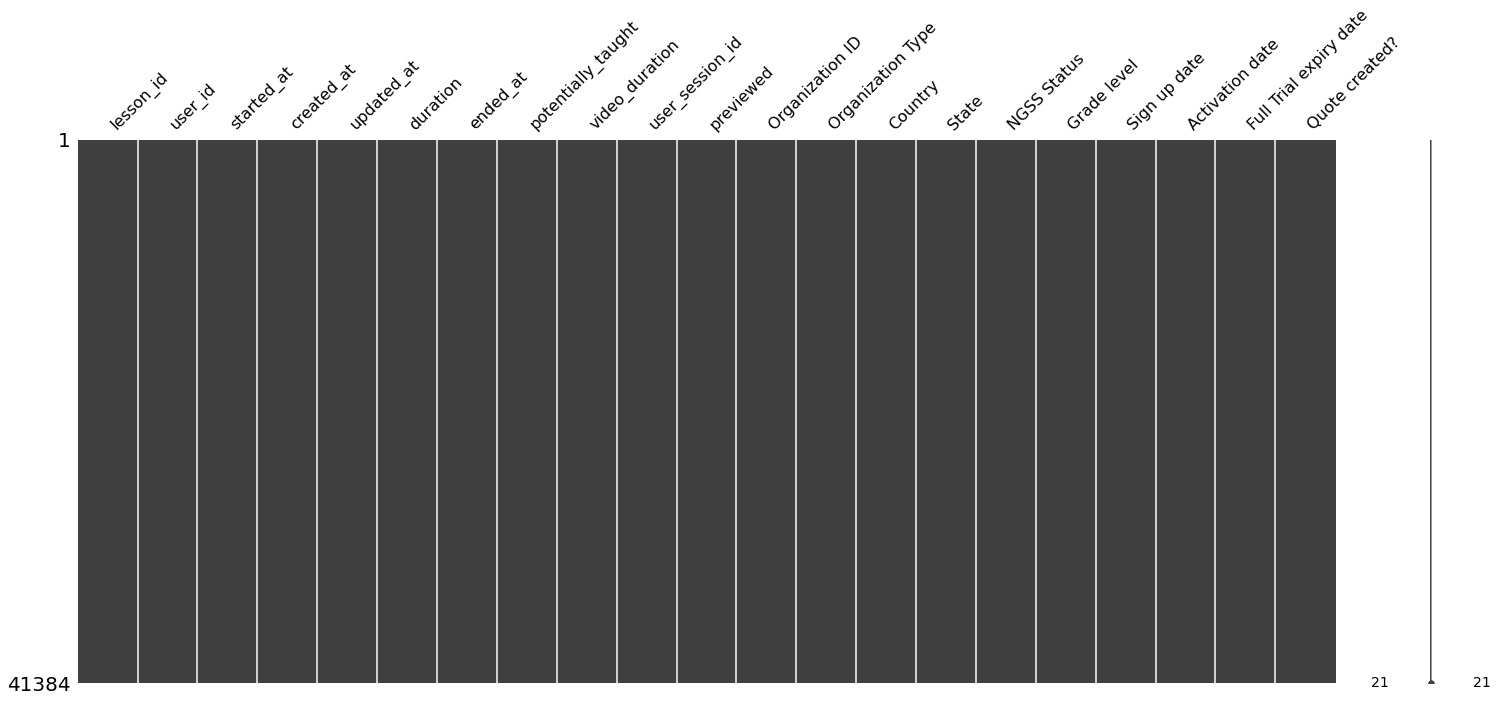

In [14]:
# drop the columns and the missing rows
cleaned_df = user_viewings_df.drop(columns=empty_columns).dropna()
# plot matix to see missing values
msno.matrix(cleaned_df)

ahh. A dataset free of missing values. Now that we've taken care of the surface...time for a 


# Deeper Clean

Lets start by taking a closer look at our column's assigned datatypes vs. what they actually are and verify they match up (and fix it when they don't).

In [15]:
# This is what they're labelled as:
cleaned_df.dtypes

lesson_id                 float64
user_id                     int64
started_at                 object
created_at                 object
updated_at                 object
duration                  float64
ended_at                   object
potentially_taught           bool
video_duration            float64
user_session_id             int64
previewed                    bool
Organization ID             int64
Organization Type          object
Country                    object
State                      object
NGSS Status                object
Grade level                object
Sign up date               object
Activation date            object
Full Trial expiry date     object
Quote created?               bool
dtype: object

In [16]:
# And this is what our data looks like: 
cleaned_df.sample(3)

,lesson_id,user_id,started_at,created_at,updated_at,duration,ended_at,potentially_taught,video_duration,user_session_id,previewed,Organization ID,Organization Type,Country,State,NGSS Status,Grade level,Sign up date,Activation date,Full Trial expiry date,Quote created?
id,,,,,,,,,,,,,,,,,,,,,
5366973,94.0,828358,2017-03-13 11:05:03 -0700,2017-03-13 11:05:03 -0700,2017-03-13 12:23:21 -0700,4400.827,2017-03-13 12:18:24 -0700,True,1129.0,10071348,True,2867,School,United States,Illinois,not sure,5,2015-08-06,2016-01-08,2016-06-30,False
3438187,30.0,885156,2016-11-03 12:02:05 -0700,2016-11-03 12:02:05 -0700,2016-11-03 12:04:44 -0700,0.001,2016-11-03 12:02:05 -0700,False,0.0,7136136,False,1291,School,United States,Tennessee,not sure,4,2015-08-15,2016-02-10,2016-06-30,False
3709027,108.0,5009632,2016-11-27 08:47:47 -0800,2016-11-27 08:47:47 -0800,2016-11-27 08:53:32 -0800,0.000,2016-11-27 08:47:47 -0800,False,0.0,7639713,False,5842,School,United States,Massachusetts,not sure,5,2016-09-18,2016-11-27,2017-06-30,False


### According to my rationale the columns breakdown as follows:

In [17]:
#### IDs:
id_columns = ['Organization ID', 'user_id', 'user_session_id', 'lesson_id']

#### Numerical:
numerical_columns = ['duration', 'video_duration']

#### Categorical:
categorical_columns = ['Country', 'State', 'NGSS Status', 'Grade level' , 'potentially_taught', 'previewed', 'Organization Type']

#### Datetime:
user_datetime = ['Sign up date', 'Activation date', 'Full Trial expiry date']
viewing_datetime = ['started_at', 'created_at', 'updated_at', 'ended_at']

#### Target:
target_variable = 'Quote created?'

Lets start by taking a look at our ...
## Target Variable

In [18]:
# Review Target Variables datatype,and value_counts normalized.
print("Target variable has been assigned a datatype of :", cleaned_df.dtypes[target_variable])
cleaned_df[target_variable].value_counts(normalize=True)

Target variable has been assigned a datatype of : bool


False    0.852479
True     0.147521
Name: Quote created?, dtype: float64

### Reflection on Target Variable
- Our target variable, `Quote created?`, is rightfully cast as a boolean value of True and False. For our plotting purposes however, this variable is better converted to 1 & 0.
- **Note**: dataset is rather skewed, with 85% of the data reflecting a `False` target variable. 

In [19]:
# cast bool column as type int (ones and zeros)
cleaned_df[target_variable] = cleaned_df[target_variable].astype(int)

So lets take a look at each datatype subgroup and verify they're labelled accordingly. Starting with 

## Numerical Variables

In [20]:
# Numerical Variables Dataset Sample
cleaned_df.loc[:,cleaned_df.columns.isin(numerical_columns)].sample(5)

,duration,video_duration
id,,
3638584,152.000,0.0
4266931,1279.000,171.0
1951586,146.692,0.0
6646770,10846.944,5244.0
3424497,75.000,0.0


In [21]:
# Review numerical columns datatype, nunique values, and value_counts
for column in numerical_columns:
    print("")
    print(f"The {column} column has been assigned a datatype of : {cleaned_df.dtypes[column]}")
    print(f"unique values: {cleaned_df[column].nunique()}")
    print(cleaned_df[column].value_counts(normalize=True).head())


The duration column has been assigned a datatype of : float64
unique values: 23310
0.0    0.272497
2.0    0.001909
3.0    0.001522
4.0    0.001305
6.0    0.001305
Name: duration, dtype: float64

The video_duration column has been assigned a datatype of : float64
unique values: 6317
0.0    0.536777
1.0    0.005824
2.0    0.004470
3.0    0.004350
4.0    0.003528
Name: video_duration, dtype: float64


### Reflection on Numerical Variables: 
- **Data types are correctly assigned**
- Out of 23310 possible `duration` values, 27% == 0.0
- Out of 6317 possible `video_duration` values, 54% == 0.0

In [22]:
# check collinearity between numerical columns
cleaned_df[numerical_columns].corr()

,duration,video_duration
duration,1.000000,0.142673
video_duration,0.142673,1.000000


These numerical variables are not correlated. 

## Categorical Variables


In [23]:
# Categorical Variables Dataset Sample
cleaned_df.loc[:,cleaned_df.columns.isin(categorical_columns)].sample(5)

,potentially_taught,previewed,Organization Type,Country,State,NGSS Status,Grade level
id,,,,,,,
5446035,False,False,School,United States,California,transitioning,Upper
5926725,False,False,School,United States,South Carolina,no,2
7108491,False,True,School,United States,Wisconsin,no,4
4478150,False,False,School,United Arab Emirates,Abu Dhabi,transitioning,4
4382274,False,False,School,United States,Michigan,transitioning,4


In [24]:
# Review categorical columns datatype, nunique values, and value_counts
for column in categorical_columns:
    print("")
    print(f"The {column} column has been assigned a datatype of : {cleaned_df.dtypes[column]}")
    print(f"unique values: {cleaned_df[column].nunique()}")
    print(cleaned_df[column].value_counts(normalize=True).head())


The Country column has been assigned a datatype of : object
unique values: 20
United States           0.952566
Canada                  0.016456
United Arab Emirates    0.013604
Dominican Republic      0.008868
Thailand                0.001885
Name: Country, dtype: float64

The State column has been assigned a datatype of : object
unique values: 78
California    0.171395
Kentucky      0.069471
Michigan      0.061231
Illinois      0.058453
Missouri      0.047313
Name: State, dtype: float64

The NGSS Status column has been assigned a datatype of : object
unique values: 4
yes              0.306205
not sure         0.293157
transitioning    0.286270
no               0.114368
Name: NGSS Status, dtype: float64

The Grade level column has been assigned a datatype of : object
unique values: 53
3    0.244756
5    0.181882
4    0.172845
2    0.121545
1    0.069036
Name: Grade level, dtype: float64

The potentially_taught column has been assigned a datatype of : bool
unique values: 2
False    0.8

### Reflection on Categorical Variables
- `previewed` and `potentially_taught` are **boolean and can be binarized**. 
- `Organization Type` **can also be binarized** since there are only 2 possible values.

In [25]:
# convert from bool to binary
cleaned_df['potentially_taught'] = cleaned_df['potentially_taught'].astype(int)
cleaned_df['previewed'] = cleaned_df['previewed'].astype(int)

# set all District values = to 1
cleaned_df['district?'] = np.where(cleaned_df['Organization Type'] == 'District', 1, 0)
cleaned_df.drop(columns='Organization Type', inplace=True)

# update categorical_columns list
categorical_columns.remove('Organization Type')
categorical_columns.append('district?')

- `NGSS Status` has 4 values and **can be easily encoded**

In [26]:
# encode NGSS Status
cleaned_df = pd.get_dummies(cleaned_df, columns=['NGSS Status'], drop_first=True)

# update categorical_columns list
categorical_columns.remove('NGSS Status')
categorical_columns.extend(list(cleaned_df.columns[-3:]))

- Out of 20 possible `Country` values, "United States" is 95% of them. We can **binarize** this feature to simplify down to domestic vs international.

In [27]:
# binarize `Country` column as new column `united_states`
cleaned_df['domestic?'] = np.where(cleaned_df.Country=='United States', 1 , 0 )
cleaned_df.drop(columns='Country', inplace=True)

# update categorical_columns list
categorical_columns.remove('Country')
categorical_columns.append('domestic?')

- Out of 78 potential `State` values, "California" is 17% of them. We could binarize against California but spotlighting the CA vs !CA is not as useful as spotlighting the domestic vs international. Alternatively we could come back to this feature and cluster these States by the prototypical 5 regions and encode those values. But **for now we'll work without it.**

In [28]:
# remove 'State' from df & categorical columns list.
cleaned_df.drop(columns='State')
categorical_columns.remove('State')

- As we saw earlier, `Grade level` **values need to be split up into separate columns.**

In [29]:
# For every value in `Grade level`, strip the spaces off the edges, and split the value on ',' and 
# expand the value into a new column. then stack. 
split_grades = cleaned_df['Grade level'].str.split(', ', expand=True).stack()
# Take the multi-indexed (stacked) grades and pass them into a DataFrame grouped by id
encoded_grades = pd.get_dummies(split_grades).groupby(level=0).sum()

# sum each row into a total grades taught column
encoded_grades['total_grades_taught'] = encoded_grades.sum(axis=1)
encoded_grades.tail(5)

,1,2,3,4,5,6,K,Pre,Upper,total_grades_taught
id,,,,,,,,,,
7859354,0,1,0,0,0,0,0,0,0,1
7860521,1,1,1,1,1,0,1,0,0,6
7864070,0,1,0,0,0,0,0,0,0,1
7864235,0,1,0,0,0,0,0,0,0,1
7864425,0,0,0,1,1,0,0,0,0,2


#### Check for multicolinearity within encoded grade levels

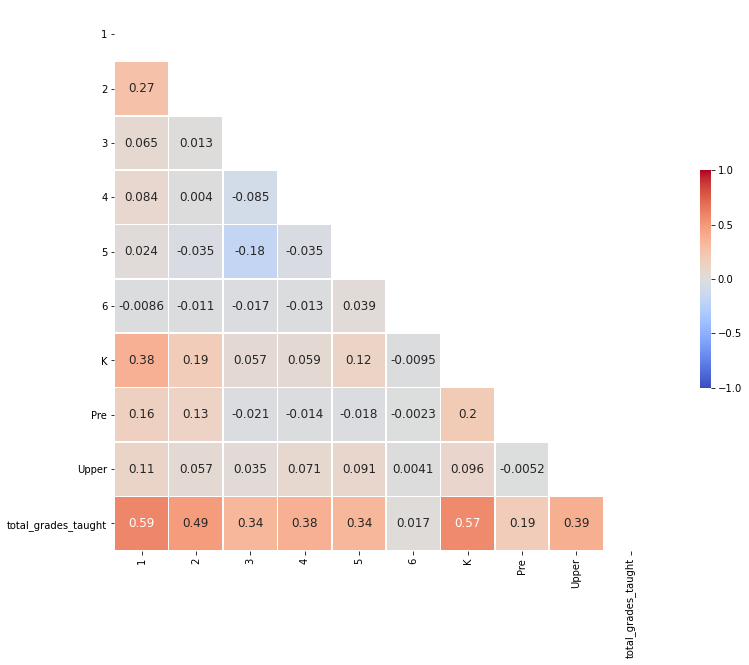

In [30]:
corr_matrix = encoded_grades.corr()

# returns an array of zeros with the same shape and type as the given array. By passing in the correlation matrix, we get an array of zeros.
# The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.
mask = np.zeros_like(corr_matrix, dtype=np.bool)

# returns the indices for the upper triangle of the array and sets the upper triangle to True.
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15,10)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Reflection on Grade Levels multicollinearity after encoding
- This heatmap reveals that, naturally, **`total grades taught` column has the highest pearson's r score** (although still quite low) against all other values. 
- This to me indicates **we could reduce model complexity by only adding the `total grades taught` column** to the final dataset

In [31]:
# add total_grades_taught to cleaned df
only_total = encoded_grades['total_grades_taught']
encoded_clean = cleaned_df.join(only_total).drop(columns='Grade level')

# update categorical_columns list
categorical_columns.remove('Grade level')
categorical_columns.append('total_grades_taught')

#### Check for multicollinearity within ALL CATEGORICAL variables

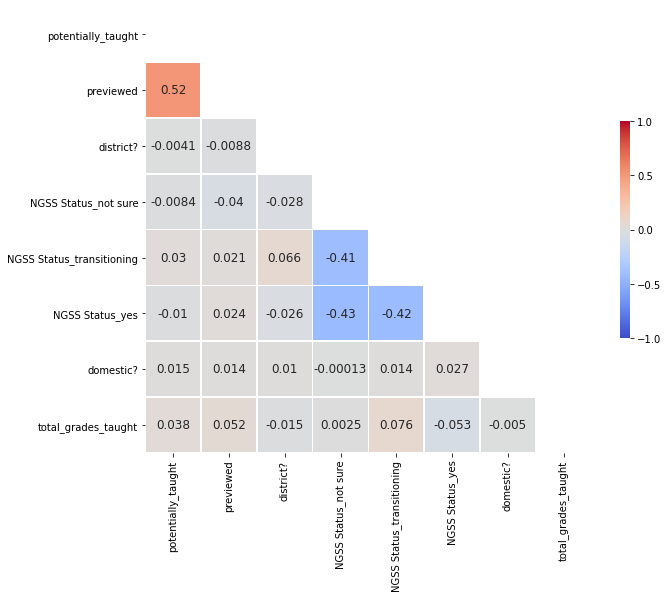

In [32]:
corr_matrix = encoded_clean[categorical_columns].corr()

# returns an array of zeros with the same shape and type as the given array. By passing in the correlation matrix, we get an array of zeros.
# The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.
mask = np.zeros_like(corr_matrix, dtype=np.bool)

# returns the indices for the upper triangle of the array and sets the upper triangle to True.
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10,10)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Reflection on ALL categorical columns multicollinearity
- This is looking great. Our categorical variables **don't show any strong multicollinearity.**
- The `previewed x potentially_taught` interaction has the highest r score, but its still an acceptable level.

## ID Variables

In [33]:
# ID Variables Dataset Sample
cleaned_df[id_columns].head()

,Organization ID,user_id,user_session_id,lesson_id
id,,,,
3535094,12476,7670,7306328,112.0
3535095,12476,7670,7306328,112.0
3536432,12476,7670,7306328,114.0
3916927,345365,9148,7970073,75.0
5099566,345365,9148,9750729,47.0


In [34]:
# Review ID columns datatype, nunique values, and value_counts
for column in id_columns:
    print("")
    print(f"The {column} column has been assigned a datatype of : {cleaned_df.dtypes[column]}")
    print(f"unique values: {cleaned_df[column].nunique()}")
    print(cleaned_df[column].value_counts(normalize=True).head())


The Organization ID column has been assigned a datatype of : int64
unique values: 657
3280    0.029552
3055    0.022714
2133    0.020539
1050    0.018220
3081    0.016504
Name: Organization ID, dtype: float64

The user_id column has been assigned a datatype of : int64
unique values: 2370
955242     0.020539
4546326    0.013483
964766     0.008361
4499417    0.007877
3358703    0.007708
Name: user_id, dtype: float64

The user_session_id column has been assigned a datatype of : int64
unique values: 26373
7893156     0.000942
5365315     0.000797
6540231     0.000507
10577980    0.000507
5831432     0.000507
Name: user_session_id, dtype: float64

The lesson_id column has been assigned a datatype of : float64
unique values: 91
84.0    0.028538
46.0    0.027619
53.0    0.027184
31.0    0.024913
91.0    0.024043
Name: lesson_id, dtype: float64


### Reflection on ID Variables Review
- These columns are all labeled as int/float values but should actually be considered like strings since they're identifiers.
- **Change all these datatypes to objects**.
- I want to visualize if any `Organization ID`, `user_id`, or `lesson-id` (or subgroup of) is particularly more represented

In [35]:
encoded_clean[id_columns] = encoded_clean[id_columns].astype('object')

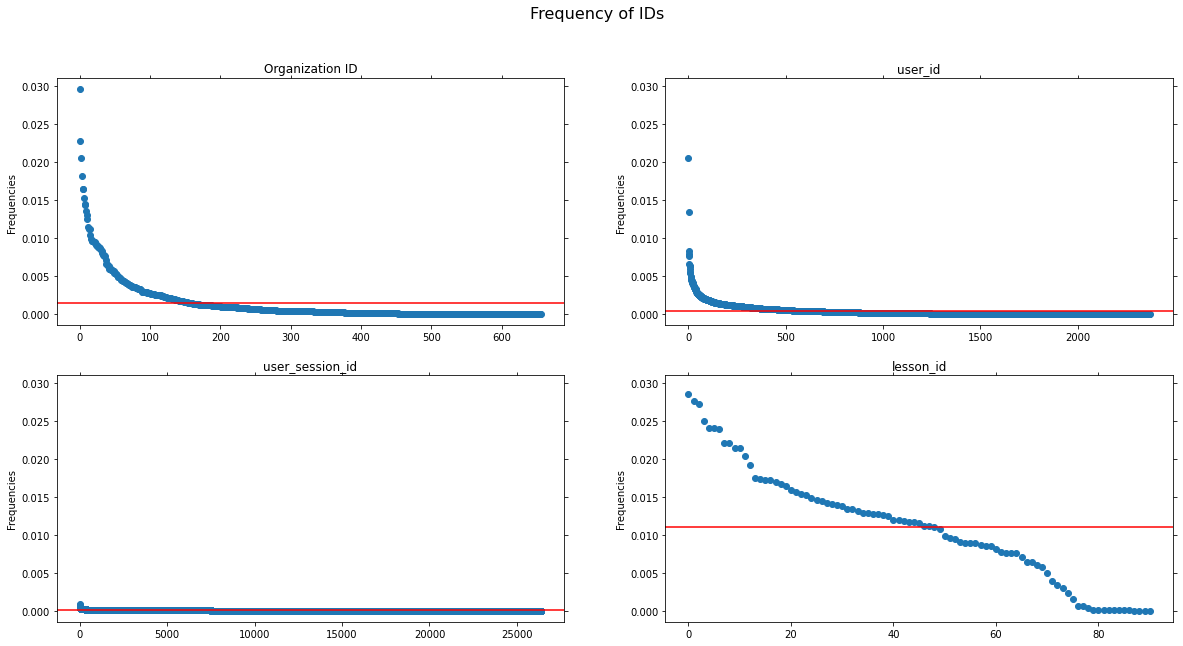

In [36]:
fig, axes = plt.subplots(2,2, figsize=(20, 10), sharey=True, )
fig.suptitle("Frequency of IDs", fontsize=16)
axes = axes.flatten()
count=1
# get the label and content of each column in id_columns
for label, content in encoded_clean[id_columns].iteritems():
#     normalize the value_counts of each column
    valcontent = content.value_counts(normalize=True)
#     get the right ax
    ax= axes[count-1]
#     and scatter the probability values against index
    ax.scatter(valcontent.reset_index().index, valcontent.values)
#     add average probability line
    ax.axhline(valcontent.values.mean(), label='avg frequency', c='red')
#     edit the ax
    ax.set_ylabel('Frequencies')
    ax.set_title(label)
    ax.tick_params(reset=True)
    
    count+=1

plt.show()

### Reflection on ID Variables frequency plots:
- `Organization ID` - There are **quite a few organizations that are represented more** than the average organization,
- `user_id` - There are are a **handful of users that are represented more** than the average user.
- `user_session_id` - as expected, this feature is almost as unique as the index itself and **should be dropped.**
- `lesson_id` - has a fairly **good spread of representation** in this data set

In [37]:
# drop user session id column & remove it from list of id columns 
encoded_clean.drop(columns='user_session_id', inplace=True)
id_columns.remove('user_session_id')

## Datetime Variables

In [38]:
# Datetime Variables Dataset Sample
encoded_clean[user_datetime+viewing_datetime].sample(5)

,Sign up date,Activation date,Full Trial expiry date,started_at,created_at,updated_at,ended_at
id,,,,,,,
3782548,2016-08-26,2016-08-26,2017-06-30,2016-12-01 10:31:38 -0800,2016-12-01 10:31:38 -0800,2016-12-01 10:35:27 -0800,2016-12-01 10:34:01 -0800
4478150,2016-10-01,2017-01-28,2017-06-30,2017-01-28 23:49:12 -0800,2017-01-28 23:49:21 -0800,2017-01-28 23:54:24 -0800,2017-01-28 23:49:12 -0800
4032854,2017-01-16,2017-01-22,2017-06-30,2016-12-23 09:34:37 -0800,2016-12-23 09:34:43 -0800,2016-12-23 09:43:33 -0800,2016-12-23 09:34:37 -0800
5534557,2017-02-20,2017-02-20,2018-06-30,2017-03-21 03:45:18 -0700,2017-03-21 03:45:18 -0700,2017-03-21 03:52:37 -0700,2017-03-21 03:50:21 -0700
4670233,2017-01-19,2017-01-23,2017-06-30,2017-02-08 07:20:11 -0800,2017-02-08 07:20:11 -0800,2017-02-08 07:29:34 -0800,2017-02-08 07:20:11 -0800


In [39]:
# Review datetime columns datatype, nunique values, and value_counts
for column in user_datetime+viewing_datetime :
    print("")
    print(f"The {column} column has been assigned a datatype of : {encoded_clean.dtypes[column]}")
    print(f"unique values: {encoded_clean[column].nunique()}")
    print(encoded_clean[column].value_counts(normalize=True).head())


The Sign up date column has been assigned a datatype of : object
unique values: 520
2016-08-11    0.022545
2015-08-20    0.021796
2015-08-19    0.017760
2016-08-30    0.016770
2016-09-19    0.015900
Name: Sign up date, dtype: float64

The Activation date column has been assigned a datatype of : object
unique values: 541
2015-08-28    0.020660
2016-08-11    0.016238
2016-08-22    0.016021
2016-08-28    0.015441
2016-09-19    0.014329
Name: Activation date, dtype: float64

The Full Trial expiry date column has been assigned a datatype of : object
unique values: 4
2017-06-30    0.716026
2016-06-30    0.217838
2018-06-30    0.060917
2017-07-01    0.005219
Name: Full Trial expiry date, dtype: float64

The started_at column has been assigned a datatype of : object
unique values: 34514
2016-09-12 22:06:27 -0700    0.000507
2016-12-05 13:33:38 -0800    0.000411
2016-09-02 12:08:06 -0700    0.000362
2016-10-31 16:41:51 -0700    0.000362
2016-09-14 10:55:17 -0700    0.000362
Name: started_at, d

### Reflection on DateTime Variables:
- All these columns need to be **converted to datetime objects** so we can manipulate them further. 
- `Full Trial expiry date` only has 4 possible values. We could encode this column if we want to. Will **consider later**

In [40]:
# convert columns to datetime objects
encoded_clean[user_datetime] = encoded_clean[user_datetime].apply(pd.to_datetime)
encoded_clean[viewing_datetime] = encoded_clean[viewing_datetime].apply(lambda x: pd.to_datetime(x, utc=True))

In [41]:
# done cleaning!
full_clean = encoded_clean.copy()

# Feature Engineering

**Reminder**: Every user who signed up during the 2016-2017 school year got a free trial which expires on June 30, 2017.
So lets begin by creating this feature

### Free Trial

In [42]:
# set variables
start_date = '2016-07-01'
end_date = '2017-06-30'
# create a mask checking if a Sign up date is after start date, and before end date.
mask = (full_clean['Sign up date'] > start_date) & (full_clean['Sign up date'] < end_date)
# Using the mask, set free trial == 1 where true.
full_clean['free_trial'] = np.where(mask, 1, 0)
# add free_trial to list of categorical columns
categorical_columns.append('free_trial')
# Review value counts of free trial feature
full_clean.free_trial.value_counts()

1    29288
0    12096
Name: free_trial, dtype: int64

**...more to come...**

## One last multicollinearity check across THE WHOLE DATASET

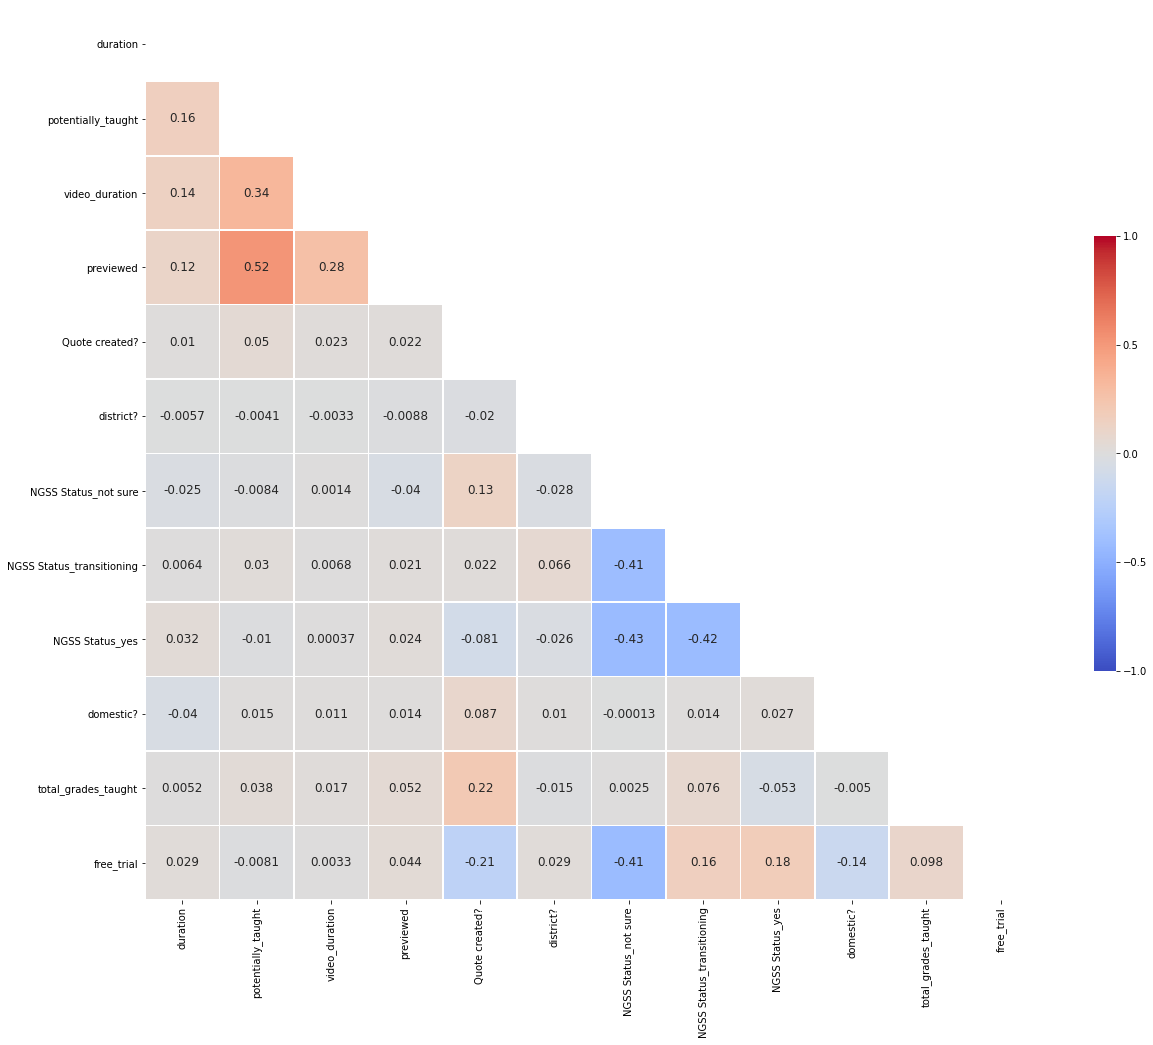

In [43]:
corr_matrix =full_clean.corr()

# returns an array of zeros with the same shape and type as the given array. By passing in the correlation matrix, we get an array of zeros.
# The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.
mask = np.zeros_like(corr_matrix, dtype=np.bool)

# returns the indices for the upper triangle of the array and sets the upper triangle to True.
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20,20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Reflection on whole dataset after cleaning
- No missing values
- No multicollinearty 
- All categorical columns encoded (or dropped otherwise)

In [44]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from eli5.sklearn import PermutationImportance

# Modeling
### What factors help predict whether or not a school will create a quote? 

- Because we're interested in predicting whether a **school** will create a quote, lets roll up our data to the school level to reduce overrepresented schools from biasing the data too much. 
- Because we're interested in determining strongest factors, lets use models that can rank feature importance like **DecisionTrees.**
- And because we're interested in a model that produces **fewer false negatives**, we'll **focus on recall**
  - (if we wanted fewer false positives, we could try precision)

In [45]:
# make a copy of the full clean df and drop user and viewing datetime columns
master_df = full_clean.copy().drop(columns=user_datetime + viewing_datetime)

# calculate the number of unique users per organization and total number of lessons viewed
num_of_users_per_org = master_df.groupby(['Organization ID']).agg(num_of_users=('user_id','nunique'), # get a count of unique users
                                                                  num_of_lessons=('lesson_id','count')) # get a count of total lessons viewed

# Group the masterdf by Organization and calculate the mean of all numerical values then join the count of users and viewed lessons
master_org = master_df.groupby(['Organization ID']).mean().join(num_of_users_per_org)

# I'm interested in classifying a school as "quoted" if even one of their users has been 'quoted'. 
# Getting the max value ensures we appropriately classify schools by single user quotes.
target_per_org = master_df.groupby(['Organization ID'])[target_variable].max()

# And lets take a look our target balance
target_per_org.value_counts(normalize=True)

0    0.870624
1    0.129376
Name: Quote created?, dtype: float64

### Reflection Naive Classification Model
- If we blindly guessed 'no' for the target variable, **our naive classifer would be 87.06% accurate** but also have a **recall score of 0** (since classifying everything as negative is 100% false negatives)

So lets try and do better using a 

## GridSearched Random Forest

tuned hpyerparameters :(best parameters)  {'max_depth': 6, 'n_estimators': 145}
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.50      0.67      0.57         3

    accuracy                           0.85        20
   macro avg       0.72      0.77      0.74        20
weighted avg       0.87      0.85      0.86        20



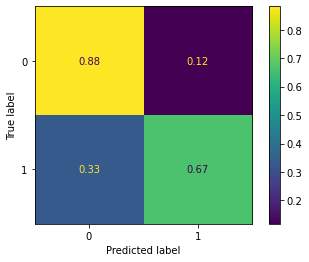

In [46]:
# Train Test split
X = master_org.drop(columns=target_variable)
y = target_per_org
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=40, stratify=y)

# Scale Variables
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# OverSample Variables
sm = SMOTE(random_state=40) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# UnderSample Variables
rus = RandomUnderSampler(random_state=40)
X_train_res, y_train_res = rus.fit_sample(X_train_res, y_train_res.ravel())

# Set grid search parameters
n_est_range = list(range(120,161,5))   # Set the range of estimators.
depth_range = list(range(3,7))         # Set the range of depth.
cv = 10                                # Set the number of CrossValidations
param_grid = [{'n_estimators': n_est_range, 'max_depth': depth_range}] 

# GridSearch
rfc = RandomForestClassifier(random_state=40) 
gsRF_cv = GridSearchCV(rfc, param_grid, cv=cv,   # Just passing in the variables declared above
                              scoring='f1',      # score best models based on F1 score
                              n_jobs=-2)         # Uses all but one of machine's processors.

# Fit the model
gsRF_cv.fit(X_train_res, y_train_res)

# Predict and print results
predictions = gsRF_cv.predict(X_test)
print("tuned hpyerparameters :(best parameters) ",gsRF_cv.best_params_)
print(classification_report(y_test, predictions))
plot_confusion_matrix(gsRF_cv, X_test, y_test, normalize='true')  

### Reflection for GridSearched Random Forest
 - resulted in an **85% accuracy** and a **67% recall score**

In [47]:
feats = {}
for feature, importance in zip(X.columns, gsRF_cv.best_estimator_.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False).head()

,Gini-importance
num_of_lessons,0.258058
potentially_taught,0.167850
num_of_users,0.096472
video_duration,0.090404
duration,0.082533


but acccording to our RandomForestClassifier, these are the top 5 most important features

In [48]:
top_5 = list(importances.sort_values(by='Gini-importance',ascending=False).head().index)

So lets run a 

# Logistic Regression 

#### Vanilla Logistic Regression with top 5 features

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       115
           1       0.00      0.00      0.00        17

    accuracy                           0.86       132
   macro avg       0.44      0.50      0.46       132
weighted avg       0.76      0.86      0.81       132



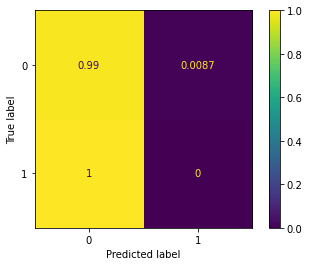

In [49]:
# train test split
X = master_org[top_5]
y = target_per_org
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

# logistic regression object
vanLR_top5 = LogisticRegression(random_state=40, penalty='l1', solver='liblinear')
  
# train the model on train set
vanLR_top5.fit(X_train_top5, y_train.ravel())

# predict values
predictions = vanLR_top5.predict(X_test_top5)
  
# print classification report
print(classification_report(y_test, predictions))
plot_confusion_matrix(vanLR_top5, X_test_top5, y_test, normalize='true')  

### Reflection for Vanilla LogisticRegression w/Top 5 features
 - resulted in an **86% accuracy** but **0% recall score**

## GridSearch Logistic Regression with top 5 features
#### lets try grid searching for better parameters to improve this model

tuned hpyerparameters :(best parameters)  {'C': 0.1}
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       115
           1       0.34      0.71      0.46        17

    accuracy                           0.79       132
   macro avg       0.65      0.75      0.66       132
weighted avg       0.87      0.79      0.82       132



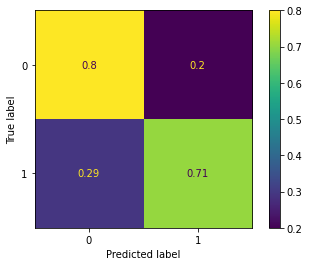

In [50]:
# train test split
X = master_org[top_5]
y = target_per_org
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

# Scale Variables
scaler = MinMaxScaler()
X_train_top5 = scaler.fit_transform(X_train_top5)
X_test_top5 = scaler.transform(X_test_top5)

# OverSample Variables
sm = SMOTE(random_state=40)
X_train_res, y_train_res = sm.fit_sample(X_train_top5, y_train.ravel())

# UnderSample Variables
rus = RandomUnderSampler(random_state=40)
X_train_res, y_train_res = rus.fit_sample(X_train_res, y_train_res.ravel())

# GridSearch
grid = {"C":np.logspace(-3,3,7)}
logreg_top5 = LogisticRegression(random_state=40, penalty='l1', solver='liblinear')
gslogreg_top5_cv = GridSearchCV(logreg_top5,grid,cv=10)
gslogreg_top5_cv.fit(X_train_res,y_train_res)

# Predictions and Results
predictions = gslogreg_top5_cv.predict(X_test_top5)
print("tuned hpyerparameters :(best parameters) ",gslogreg_top5_cv.best_params_)
print(classification_report(y_test, predictions))
plot_confusion_matrix(gslogreg_top5_cv, X_test_top5, y_test, normalize='true')  

### Reflection for GridSearched Logistic Regression w/Top 5 features
- resulted in a **79% accuracy** and **71% recall**

## GridSearch Logistic Regression on all variables


tuned hpyerparameters :(best parameters)  {'C': 1.0}
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       115
           1       0.41      0.65      0.50        17

    accuracy                           0.83       132
   macro avg       0.68      0.75      0.70       132
weighted avg       0.87      0.83      0.85       132



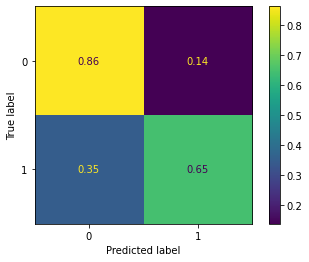

In [51]:
# train test split
X = master_org.drop(columns=target_variable)
y = target_per_org
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

# Scale Variables
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# OverSample Variables
sm = SMOTE(random_state=40)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# UnderSample Variables
rus = RandomUnderSampler(random_state=40)
X_train_res, y_train_res = rus.fit_sample(X_train_res, y_train_res.ravel())

# GridSearch 
grid = {"C":np.logspace(-3,3,7)}
gslogreg_all = LogisticRegression(random_state=40, penalty='l1',solver='liblinear')
gslogreg_all_cv = GridSearchCV(gslogreg_all,grid,cv=10)
gslogreg_all_cv.fit(X_train_res,y_train_res)

# Predictions and Results
predictions = gslogreg_all_cv.predict(X_test)
print("tuned hpyerparameters :(best parameters) ",gslogreg_all_cv.best_params_)
print(classification_report(y_test, predictions))
plot_confusion_matrix(gslogreg_all_cv, X_test, y_test, normalize='true')  

### Reflection for GridSearched LogisticRegression (with all features)
 - resulted in an **83% accuracy** and **65% recall**

# Model Comparison
### ROC AUC

No Skill: ROC AUC=0.500
GSRFC: ROC AUC=0.941
Vanilla LR TOP5: ROC AUC=0.814
GRLR TOP 5: ROC AUC=0.834
GSLR ALL: ROC AUC=0.846


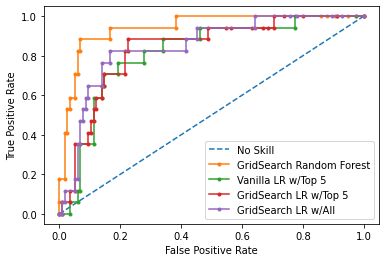

In [52]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for GSRandomForest
gsRF_cv_probs = gsRF_cv.predict_proba(X_test)[:, 1]

# predict probabilities for VanillaLogReg with TOP FIVE
vanLR_top5_probs = vanLR_top5.predict_proba(X_test_top5)[:, 1]

# predict probabilities for GSLogReg with TOP FIVE
gslogreg_top5_probs = gslogreg_top5_cv.predict_proba(X_test_top5)[:, 1]

# predict probabilities for GSLogReg with ALL VARIABLES
gslr_all_probs = gslogreg_all_cv.predict_proba(X_test)[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
gsRF_cv_auc = roc_auc_score(y_test, gsRF_cv_probs)
vanLR_top5_auc = roc_auc_score(y_test, vanLR_top5_probs)
gslogreg_top5_auc = roc_auc_score(y_test, gslogreg_top5_probs)
gslr_all_probs_auc = roc_auc_score(y_test, gslr_all_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GSRFC: ROC AUC=%.3f' % (gsRF_cv_auc))
print('Vanilla LR TOP5: ROC AUC=%.3f' % (vanLR_top5_auc))
print('GRLR TOP 5: ROC AUC=%.3f' % (gslogreg_top5_auc))
print('GSLR ALL: ROC AUC=%.3f' % (gslr_all_probs_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gsRF_fpr, gsRF_tpr, _ = roc_curve(y_test, gsRF_cv_probs)
vanLR_top5_fpr, vanLR_top5_tpr, _ = roc_curve(y_test, vanLR_top5_probs)
gslogreg_top5_fpr, gslogreg_top5_tpr, _ = roc_curve(y_test, gslogreg_top5_probs)
gslr_all_fpr, gslr_all_tpr, _ = roc_curve(y_test, gslr_all_probs)


# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gsRF_fpr, gsRF_tpr, marker='.', label='GridSearch Random Forest')
plt.plot(vanLR_top5_fpr, vanLR_top5_tpr, marker='.', label='Vanilla LR w/Top 5')
plt.plot(gslogreg_top5_fpr, gslogreg_top5_tpr, marker='.', label='GridSearch LR w/Top 5')
plt.plot(gslr_all_fpr, gslr_all_tpr, marker='.', label='GridSearch LR w/All')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision-Recall Curves 
Precision-Recall curves should be used when there is a moderate to large class imbalance like we have

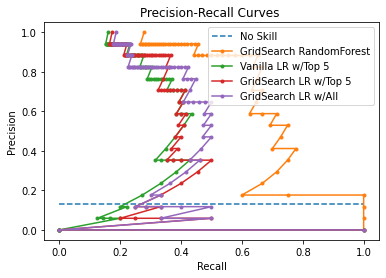

In [53]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for GSRandomForest
gsRF_cv_probs = gsRF_cv.predict_proba(X_test)[:, 1]

# predict probabilities for VanillaLogReg with TOP FIVE
vanLR_top5_probs = vanLR_top5.predict_proba(X_test_top5)[:, 1]

# predict probabilities for GSLogReg with TOP FIVE
gslogreg_top5_probs = gslogreg_top5_cv.predict_proba(X_test_top5)[:, 1]

# predict probabilities for GSLogReg with ALL VARIABLES
gslr_all_probs = gslogreg_all_cv.predict_proba(X_test)[:, 1]

# calculate precision recall curve
gsRF_precision, gsRF_recall, _ = precision_recall_curve(y_test, gsRF_cv_probs)
vanLRtop5_precision, vanLRtop5_recall, _ = precision_recall_curve(y_test, vanLR_top5_probs)
gsLRtop5_precision, gsLRtop5_recall, _ = precision_recall_curve(y_test, gslogreg_top5_probs)
gsLRall_precision, gsLRall_recall, _ = precision_recall_curve(y_test, gslr_all_probs)


# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(gsRF_precision, gsRF_recall, marker='.', label='GridSearch RandomForest')
plt.plot(vanLRtop5_precision, vanLRtop5_recall, marker='.', label='Vanilla LR w/Top 5')
plt.plot(gsLRtop5_precision, gsLRtop5_recall, marker='.', label='GridSearch LR w/Top 5')
plt.plot(gsLRall_precision, gsLRall_recall, marker='.', label='GridSearch LR w/All')

# axis labels
plt.title('Precision-Recall Curves ')
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()